# Feature Importance

Feature importance refers to a class of techniques for assigning scores to input features to a predictive model that indicates the relative importance of each feature when making a prediction.

Feature importance scores can be calculated for problems that involve predicting a numerical value, called regression, and those problems that involve predicting a class label, called classification.

The scores are useful and can be used in a range of situations in a predictive modeling problem, such as:

* Better understanding the data.
* Better understanding a model.
* Reducing the number of input features.

__Feature importance scores__ can provide insight into the dataset. The relative scores can highlight which features may be most relevant to the target, and the converse, which features are the least relevant. This may be interpreted by a domain expert and could be used as the basis for gathering more or different data.

__Feature importance scores__ can provide insight into the model. Most importance scores are calculated by a predictive model that has been fit on the dataset. Inspecting the importance score provides insight into that specific model and which features are the most important and least important to the model when making a prediction. This is a type of model interpretation that can be performed for those models that support it.

__Feature importance__ can be used to improve a predictive model. This can be achieved by using the importance scores to select those features to delete (lowest scores) or those features to keep (highest scores). This is a type of feature selection and can simplify the problem that is being modeled, speed up the modeling process (deleting features is called dimensionality reduction), and in some cases, improve the performance of the model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv("C:\\Users\\admin\\Desktop\\Data\\Feature-Engineering\\mobile_dataset.csv")
data.shape

(2000, 21)

In [5]:
X=data.iloc[:,:-1]
X
y=data["price_range"]
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [8]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# Univariate Selection with SelectKBest

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [10]:
ordered_feature=SelectKBest(score_func=chi2,k=10)
ordered_score=ordered_feature.fit(X,y)

In [18]:
#X.columns
ordered_score.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [23]:
score_ranking.sort_values("Scores",ascending=False).head(10)
score_ranking.nlargest(10,"Scores")

,Column_Names,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [24]:
df_scores=pd.DataFrame(ordered_score.scores_,columns=["Scores"])
df_columns=pd.DataFrame(X.columns,columns=["Column_Names"])
score_ranking=pd.concat([df_columns,df_scores],axis=1)
score_ranking.sort_values("Scores",ascending=False).head(10)
score_ranking.nlargest(10,"Scores")

,Column_Names,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Correlation Plot

<AxesSubplot:>

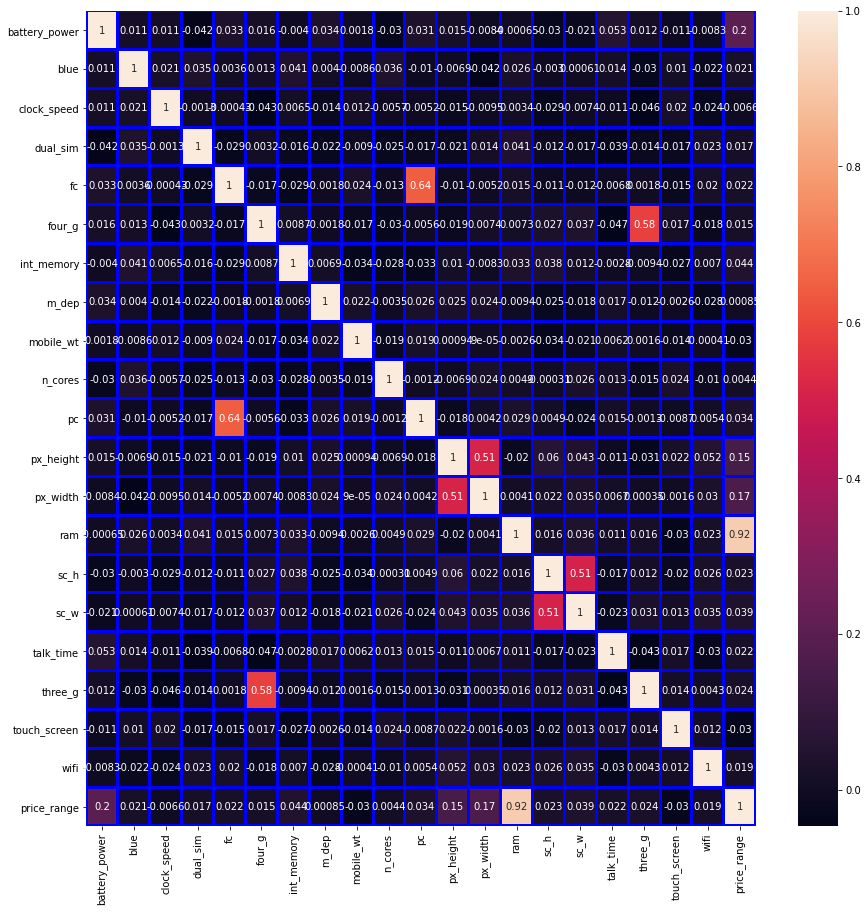

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),linewidths=2,linecolor="blue",annot=True)

## Extra Tree Classifier

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [29]:
model.feature_importances_

array([0.0622297 , 0.02056766, 0.03498877, 0.01976873, 0.03340106,
       0.01715127, 0.03641855, 0.03436085, 0.03650486, 0.0343068 ,
       0.03359973, 0.04816478, 0.04850679, 0.38357909, 0.03460963,
       0.03469935, 0.03516237, 0.01385843, 0.01812861, 0.01999296])

<AxesSubplot:>

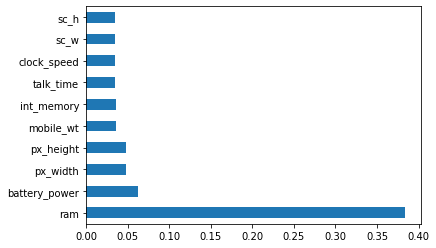

In [32]:
feature_scores=pd.Series(model.feature_importances_,index=X.columns)
feature_scores
feature_scores.nlargest(10).plot(kind="barh")

## Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=101)

rf.fit(X,y)
rf.feature_importances_


array([0.07419456, 0.00643939, 0.02738955, 0.0064666 , 0.0251107 ,
       0.00631722, 0.03689824, 0.02533421, 0.03996894, 0.02302337,
       0.03024911, 0.0563807 , 0.05993121, 0.47990663, 0.02596074,
       0.02809547, 0.02986004, 0.00552687, 0.00637644, 0.00657001])

<AxesSubplot:>

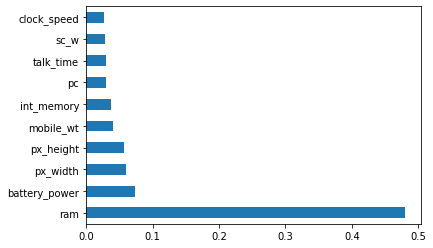

In [35]:
rf_scores=pd.Series(rf.feature_importances_,index=X.columns)
rf_scores
rf_scores.nlargest(10).plot(kind="barh")

### Logistic Regression

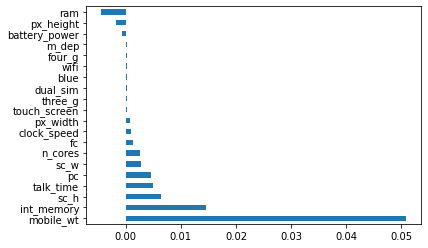

In [51]:
#Logistic Regression is just for Display purposes, Not recommended as the problem statement has multiple categories to predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lr=LogisticRegression()
lr.fit(X_train,y_train)

pd.Series(lr.coef_[0],index=X.columns).sort_values(ascending=False).plot(kind="barh");

# Chi2 Test

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
df=df[["survived","pclass","sex","embarked","alone"]]
df.head()

,survived,pclass,sex,embarked,alone
0,0,3,male,S,False
1,1,1,female,C,False
2,1,3,female,S,True
3,1,1,female,S,False
4,0,3,male,S,True


## Missing Value Treatment

In [40]:
df.isnull().sum()
df["embarked"].value_counts()
df["embarked"].fillna("S",inplace=True)

In [41]:
df.isnull().sum()
df["embarked"].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [42]:
df["sex"]=np.where(df["sex"]=="male",1,0)
df["embarked"]=le.fit_transform(df["embarked"])
df["alone"]=le.fit_transform(df["alone"])
df.head()

,survived,pclass,sex,embarked,alone
0,0,3,1,2,0
1,1,1,0,0,0
2,1,3,0,2,1
3,1,1,0,2,0
4,0,3,1,2,1


In [43]:
df.head()

,survived,pclass,sex,embarked,alone
0,0,3,1,2,0
1,1,1,0,0,0
2,1,3,0,2,1
3,1,1,0,2,0
4,0,3,1,2,1


## Splitting the Data 

__to avoid over fitting issue__

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df[["pclass","sex","embarked","alone"]], df[["survived"]], test_size=0.3, random_state=42)

In [45]:
y_train

,survived
445,1
650,0
172,1
450,0
314,0
...,...
106,1
270,0
860,0
435,1


In [46]:
chi2_data=chi2(X_train,y_train)
chi2_data

#THe higher the f-score value the more important the column will be
#The lower the p-value the more important the column will be

(array([17.40807208, 60.41964418,  8.17478522,  8.35778435]),
 array([3.01542662e-05, 7.66442567e-15, 4.24766985e-03, 3.84038546e-03]))

In [47]:
karan=pd.concat([pd.DataFrame(X_train.columns,columns=["C_Name"]),pd.DataFrame(chi2_data[0],columns=["F-Score"]),pd.DataFrame(chi2_data[1],columns=["Chi2-value"])],axis=1)
karan

,C_Name,F-Score,Chi2-value
0,pclass,17.408072,3.015427e-05
1,sex,60.419644,7.664426e-15
2,embarked,8.174785,4.247670e-03
3,alone,8.357784,3.840385e-03


In [17]:
karan["F-Score"].sort_values(ascending=False)#Looking for highest F-score

1    60.419644
0    17.408072
3     8.357784
2     8.174785
Name: F-Score, dtype: float64

In [16]:
karan["Chi2-value"].sort_values(ascending=True)#Looking for lowest Chi2-value

1    7.664426e-15
0    3.015427e-05
3    3.840385e-03
2    4.247670e-03
Name: Chi2-value, dtype: float64

# Thank You!